# 안녕하세요^^ 
## AI 프로젝트 따라하기 - 원내비 도착시간 예측 모델링 과정에 오신 여러분을 환영합니다.
* 본 과정에서는 주변에서 마주할 수 있는 연속성을 가지는 수치를 예측할 수 있는 회귀문제를 예제코드를 통해서 기계학습(머신러닝 및 딥러닝)을 활용해서 해결할 것입니다.
* 네비게이션 주행데이터를 가지고 도착시간 정확도를 개선하는 과정을 통해 실전 AI 과제 수행에 있어 자신감을 가질 수 있는 기회가 되었으면 좋겠습니다.
* AI문제 해결 과정 'A에서 Z까지', 지금부터 시작합니다!

## 기본전제
[기본 데이터]
* 학습데이터 : onenavi_train.csv(7월 20일에서 24일 사이의 수도권 3~15km 주행데이터)
* 평가데이터 : onenavi_evaluation.csv(7월 27일에서 31일 사이의 수도권 3~15km 주행데이터)

[추가 데이터]
* 주소(시군구)데이터 : onenavi_pnu.csv(주행데이터를 기준으로 출발지의 주소 정보, key : RID)
* 신호등(갯수)데이터 : onenavi_signal.csv(주행데이터를 기준으로 경로의 신호등 갯수, key : RID)
* 날씨데이터 : onenavi_weather.csv(주행데이터를 기준으로 해당 일자의 수도권 날씨 정보, key : RID)

# 1. 데이터 불러오기
## 모든 AI프로젝트의 시작은 '데이터 불러오기' 부터라고 할 수 있습니다.
+ KeyPoint : 불러오고자 하는 데이터에 따라 자유롭게 변수로 지정할 수 있다.
+ [참고] AIDU에서는 반드시 추가 라이브러리 Import와 설정을 해야만 데이터 불러오기가 가능하다.

#### ※ 참고 : PEP8(https://www.python.org/dev/peps/pep-0008/)를 준수하나 교육상 필요 시 상황에 맞춰 실습할 예정입니다.

### 가. 라이브러리 Import

In [1]:
import pandas as pd
import numpy as np

#### [참고] AIDU에서 필요한 추가 라이브러리 Import : 아래 코드는 AIDU에서만 실행 가능합니다.

In [2]:
# from aicentro.session import Session
# from aicentro.framework.tensorflow import Tensorflow as AiduFrm

### 나. 데이터 프레임 변수로 저장(여기서는 CSV 기준으로 진행)
* csv : pd.read_csv("파일이름. csv")
* txt : pd.read_csv("파일이름. csv", sep="구분자")
* xlsx : pd.read_excel('파일이름.xlsx')
* pickle : pd.read_pickle("파일이름.pkl") <br>
 [참고] pickle은 파이썬의 모든 객체를 파일로 저장할 수 있는 방법으로 DataFrame,List,Dict 등 모든 객체 저장 가능(특히 sklearn라이브러리를 통해 모델을 학습시키고, 저장할 때 많이 사용)

In [3]:
df = pd.read_csv("onenavi_train.csv", sep="|")
df # 데이터 프레임 확인하기

,RID,TIME_DEPARTUREDATE,TIME_ARRIVEDATE,A_DISTANCE,ET,ETA,ETAA
0,router-84875df7fc-b5nxc-7-20255166-0,2020-07-20 05:35:21.000,2020-07-20 05:55:22.599,12914.0,1201.534058,987.624634,82.196974
1,router-84875df7fc-b5nxc-6-10888379-0,2020-07-20 05:55:22.000,2020-07-20 06:09:06.941,7483.0,823.817017,855.933716,96.101477
2,router-84875df7fc-cmkz9-7-45806143-0,2020-07-20 00:13:46.000,2020-07-20 00:22:32.909,8087.0,526.710999,575.954529,90.650750
3,router-84875df7fc-scxcj-7-47843617-0,2020-07-20 00:13:43.000,2020-07-20 00:28:42.729,10528.0,898.581970,537.117004,59.773846
4,router-84875df7fc-scxcj-3-20061505-0,2020-07-20 00:01:57.000,2020-07-20 00:17:58.169,10636.0,957.758972,786.352539,82.103385
...,...,...,...,...,...,...,...
55895,router-84875df7fc-8n4sw-2-7745536-0,2020-07-24 23:57:07.000,2020-07-25 00:06:15.697,4448.0,544.301025,550.907715,98.786207
55896,router-84875df7fc-scxcj-1-6043477-0,2020-07-24 23:57:26.000,2020-07-25 00:07:15.291,3106.0,535.666992,459.554443,85.791070
55897,router-84875df7fc-b5nxc-6-13399736-0,2020-07-24 23:57:46.000,2020-07-25 00:07:56.841,10325.0,610.799988,791.658936,70.389825
55898,router-84875df7fc-cmkz9-7-56753908-0,2020-07-24 23:58:03.000,2020-07-25 00:12:42.402,4458.0,878.479004,516.855774,58.835302


#### [참고] AIDU에서는 파일을 불러올 때 아래 예시를 참고 : 아래 코드는 AIDU에서만 실행 가능합니다.

In [4]:
# aicentro_session = Session(verify = False)
# aidu_framework = AiduFrm(session = aicentro_session)
# df = pd.read_csv(aidu_framework.config.data_dir+"/onenavi_train.csv",sep="|")
# df # 데이터 프레임 확인하기

### 다. 학습데이터와 평가데이터 합치기
#### 학습데이터(onenavi_train.csv)는 7월 20일에서 24일까지 자료입니다.
#### 평가데이터(onenavi_evaluation.csv)는 7월 27일에서 31일까지 자료입니다.

### 만약에 Train/Evaluation 데이터를 따로 전처리 한다면?
* 전처리 기준(특히 정규화 작업 시)이 달라져서 모델의 성능에 악영향을 줄 수 있음

In [5]:
df = pd.read_csv("onenavi_train.csv",sep="|")
df_eval = pd.read_csv("onenavi_evaluation.csv",sep="|")
# 학습/평가 데이터의 전처리 기준을 통일하기위해 데이터 합본
df_total=pd.concat([df,df_eval],ignore_index=True)

In [6]:
# df = pd.read_csv(aidu_framework.config.data_dir+"onenavi_train.csv",sep="|")
# df_eval = pd.read_csv(aidu_framework.config.data_dir+"onenavi_evaluation.csv",sep="|")
# # 학습/평가 데이터의 전처리 기준을 통일하기위해 데이터 합본
# df_total=pd.concat([df,df_eval],ignore_index=True)

In [7]:
df_total# 데이터 확인

,RID,TIME_DEPARTUREDATE,TIME_ARRIVEDATE,A_DISTANCE,ET,ETA,ETAA
0,router-84875df7fc-b5nxc-7-20255166-0,2020-07-20 05:35:21.000,2020-07-20 05:55:22.599,12914.0,1201.534058,987.624634,82.196974
1,router-84875df7fc-b5nxc-6-10888379-0,2020-07-20 05:55:22.000,2020-07-20 06:09:06.941,7483.0,823.817017,855.933716,96.101477
2,router-84875df7fc-cmkz9-7-45806143-0,2020-07-20 00:13:46.000,2020-07-20 00:22:32.909,8087.0,526.710999,575.954529,90.650750
3,router-84875df7fc-scxcj-7-47843617-0,2020-07-20 00:13:43.000,2020-07-20 00:28:42.729,10528.0,898.581970,537.117004,59.773846
4,router-84875df7fc-scxcj-3-20061505-0,2020-07-20 00:01:57.000,2020-07-20 00:17:58.169,10636.0,957.758972,786.352539,82.103385
...,...,...,...,...,...,...,...
109637,router-84875df7fc-b5nxc-0-6856031-0,2020-07-31 11:09:24.000,2020-07-31 11:15:59.833,4457.0,393.873993,633.093689,39.264917
109638,router-84875df7fc-cmkz9-7-71080475-0,2020-07-31 11:09:25.000,2020-07-31 11:17:26.427,5518.0,478.945007,377.083557,78.732120
109639,router-84875df7fc-cmkz9-7-71082304-0,2020-07-31 11:10:04.000,2020-07-31 11:14:01.092,4025.0,223.481995,412.308411,15.507101
109640,router-84875df7fc-b5nxc-4-75603454-0,2020-07-31 11:11:46.000,2020-07-31 11:17:47.095,3372.0,360.329010,580.275146,38.959637


# 2. 추가변수 생성
## 주어진 데이터만 가지고 모델링을 한다면 세상을 너무 만만하게 보고 있는 것입니다.
+ KeyPoint : 모델에 영향을 줄 수 있는 다양한 변수를 고민하고 기존 데이터와 Merge 할 수 있다.

### 사실 추가변수 생성은 데이터 전처리 영역의 범위로 보는 경우도 있습니다.
### 데이터 분석과 전처리는 '닭이 먼저냐? 달걀이 먼저냐?'와 같이 상호 인과관계를 가질 수 있습니다.
### 다만 여기서는 교육의 원활한 진행을 위해 데이터 분석 이전에 진행하겠습니다.
#### 주행에 영향을 미치는 요소는 어떤 것이 있을까요? 저는 좌표정보와 경로의 신호등 여부를 생각해봤습니다.
#### 그렇다면 어떻게 변수화 할까요?
#### 좌표정보는 출발지의 좌표를 기준으로 시군구 단위를 주소정보로 신호등 여부는 경로 상의 신호등 갯수를 변수로 만들 수 있겠네요.
#### Route ID를 기준으로 미리 데이터 프레임을 만들어 두었습니다.

In [8]:
df_pnu = pd.read_csv("onenavi_pnu.csv",sep="|") # 주소(시도/시군구 정보)
df_signal = pd.read_csv("onenavi_signal.csv",sep="|") # 경로의 신호등 갯수

In [9]:
# df_pnu = pd.read_csv(aidu_framework.config.data_dir+"onenavi_pnu.csv",sep="|") # 주소(시도/시군구 정보)
# df_signal = pd.read_csv(aidu_framework.config.data_dir+"onenavi_signal.csv",sep="|") # 경로의 신호등 갯수

In [10]:
df_total=pd.merge(df_total,df_pnu , on="RID")
df_total=pd.merge(df_total,df_signal , on="RID")
df_total

,RID,TIME_DEPARTUREDATE,TIME_ARRIVEDATE,A_DISTANCE,ET,ETA,ETAA,level1_pnu,level2_pnu,signaltype
0,router-84875df7fc-b5nxc-7-20255166-0,2020-07-20 05:35:21.000,2020-07-20 05:55:22.599,12914.0,1201.534058,987.624634,82.196974,경기도,광명시,7.0
1,router-84875df7fc-b5nxc-6-10888379-0,2020-07-20 05:55:22.000,2020-07-20 06:09:06.941,7483.0,823.817017,855.933716,96.101477,서울특별시,영등포구,31.0
2,router-84875df7fc-cmkz9-7-45806143-0,2020-07-20 00:13:46.000,2020-07-20 00:22:32.909,8087.0,526.710999,575.954529,90.650750,경기도,김포시,6.0
3,router-84875df7fc-scxcj-7-47843617-0,2020-07-20 00:13:43.000,2020-07-20 00:28:42.729,10528.0,898.581970,537.117004,59.773846,경기도,광주시,2.0
4,router-84875df7fc-scxcj-3-20061505-0,2020-07-20 00:01:57.000,2020-07-20 00:17:58.169,10636.0,957.758972,786.352539,82.103385,경기도,안산시 상록구,28.0
...,...,...,...,...,...,...,...,...,...,...
109268,router-84875df7fc-b5nxc-0-6856031-0,2020-07-31 11:09:24.000,2020-07-31 11:15:59.833,4457.0,393.873993,633.093689,39.264917,경기도,용인시 처인구,21.0
109269,router-84875df7fc-cmkz9-7-71080475-0,2020-07-31 11:09:25.000,2020-07-31 11:17:26.427,5518.0,478.945007,377.083557,78.732120,서울특별시,광진구,0.0
109270,router-84875df7fc-cmkz9-7-71082304-0,2020-07-31 11:10:04.000,2020-07-31 11:14:01.092,4025.0,223.481995,412.308411,15.507101,경기도,연천군,2.0
109271,router-84875df7fc-b5nxc-4-75603454-0,2020-07-31 11:11:46.000,2020-07-31 11:17:47.095,3372.0,360.329010,580.275146,38.959637,경기도,성남시 분당구,10.0


# 3. 데이터 분석하기
## 최적의 모델을 만들기위해 데이터를 입체적으로 바라보는 시도는 중요합니다.
+ KeyPoint : 데이터의 형태를 살펴보고 다양한 분석기법을 통해 모델링에 적합하도록 정제요소를 선별할 수 있다.
  * 관측치들의 패턴 탐색
  * 잘못된 자료들을 탐색
  * 변수들간의 관계 파악

### 가. 라이브러리 Import

In [11]:
!pip install seaborn

import seaborn as sns
import matplotlib.pyplot as plt

### 나. Seaborn을 활용한 데이터 시각화
#### Seaborn 라이브러리는 데이터를 직관적으로 볼 수 있도록 다양한 지원을 해주고 있습니다.
#### 여기서는 Seaborn이 제공하는 통계차트 중 대표적인 몇 가지를 활용해보고자 합니다.
[참고] 공식 Document
* Seaborn(https://seaborn.pydata.org/api.html)
* Seaborn.CountChart(https://seaborn.pydata.org/generated/seaborn.countplot.html)
* Seaborn.Distplot(https://seaborn.pydata.org/generated/seaborn.distplot.html?highlight=distplot#seaborn.distplot) : 히스토그램 + 커널밀도
* Seaborn.Boxplot(https://seaborn.pydata.org/generated/seaborn.boxplot.html#seaborn.boxplot)
* Seaborn.Heatmap(https://seaborn.pydata.org/generated/seaborn.heatmap.html?highlight=heatmap#seaborn.heatmap)
* Seaborn.Pairplot(https://seaborn.pydata.org/generated/seaborn.pairplot.html?highlight=pairplot#seaborn.pairplot) : 조합별 히스토그램 + 산점도

##### ※ 데이터 분석 및 실습을 위해 Mock(Fake) 데이터를 활용하려고 합니다. 이를 위해 우리는 Faker 라이브러리를 사용하겠습니다.

##### 1) CountChart

In [12]:
# 설치된 폰트 리스트 출력
import matplotlib.font_manager as fm

fm.get_fontconfig_fonts()

font_list = [font.name for font in fm.fontManager.ttflist]
font_list

['cmb10',
 'STIXSizeTwoSym',
 'STIXSizeFourSym',
 'DejaVu Serif',
 'STIXNonUnicode',
 'DejaVu Serif Display',
 'STIXNonUnicode',
 'STIXSizeFourSym',
 'STIXSizeOneSym',
 'DejaVu Sans',
 'STIXSizeTwoSym',
 'DejaVu Serif',
 'DejaVu Sans Mono',
 'DejaVu Serif',
 'STIXSizeThreeSym',
 'STIXNonUnicode',
 'STIXGeneral',
 'STIXGeneral',
 'cmr10',
 'STIXGeneral',
 'cmex10',
 'DejaVu Sans',
 'DejaVu Sans Mono',
 'cmmi10',
 'DejaVu Sans',
 'DejaVu Sans Mono',
 'cmss10',
 'STIXNonUnicode',
 'DejaVu Sans',
 'cmsy10',
 'DejaVu Sans Display',
 'STIXSizeThreeSym',
 'STIXSizeOneSym',
 'DejaVu Serif',
 'DejaVu Sans Mono',
 'cmtt10',
 'STIXGeneral',
 'STIXSizeFiveSym',
 'NanumGothicCoding',
 'DejaVu Sans Mono',
 'DejaVu Sans',
 'DejaVu Serif',
 'DejaVu Sans',
 'NanumGothicCoding',
 'DejaVu Sans Mono',
 'DejaVu Serif']

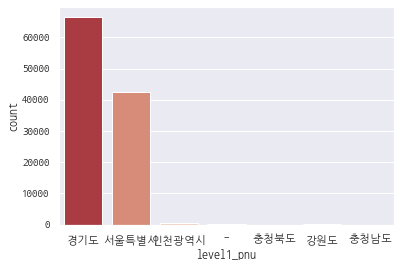

In [13]:
sns.set(font="NanumGothicCoding", 
        rc={"axes.unicode_minus":False}, # 마이너스 부호 깨짐 현상 해결
        style='darkgrid')
ax = sns.countplot(x=df_total['level1_pnu'], palette = "RdBu")

##### 2) DistChart

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


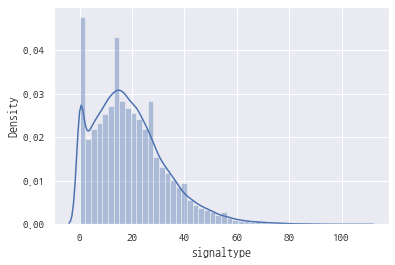

In [14]:
x = df_total['signaltype'] # 샘플 생성

sns.distplot(x)
plt.show()

##### 3) Boxplot

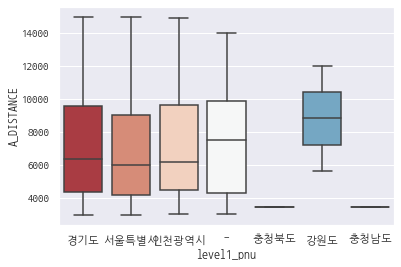

In [15]:
# 만들어진 데이터프레임으로 BoxPlot을 그려보겠습니다.
sns.boxplot(x = df_total['level1_pnu'], y = df_total['A_DISTANCE'], data = df_total, palette = "RdBu")
plt.show()

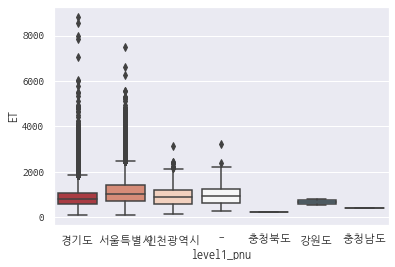

In [16]:
# 만들어진 데이터프레임으로 BoxPlot을 그려보겠습니다.
sns.boxplot(x = df_total['level1_pnu'], y = df_total['ET'], data = df_total, palette = "RdBu")
plt.show()

##### 4) Heatmap : 상관관계 분석 등에서 한 눈에 바로 확인할 수 있는 차트입니다.

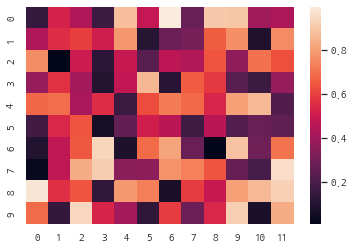

In [17]:
uniform_data = np.random.rand(10, 12) # 난수로 데이터 만들기
sns.heatmap(uniform_data)
plt.show()

##### 5) Pariplot : 데이터 프레임의 수치형 변수를 기준으로 밀도와 분포를 한 눈에 확인할 수 있는 차트입니다.

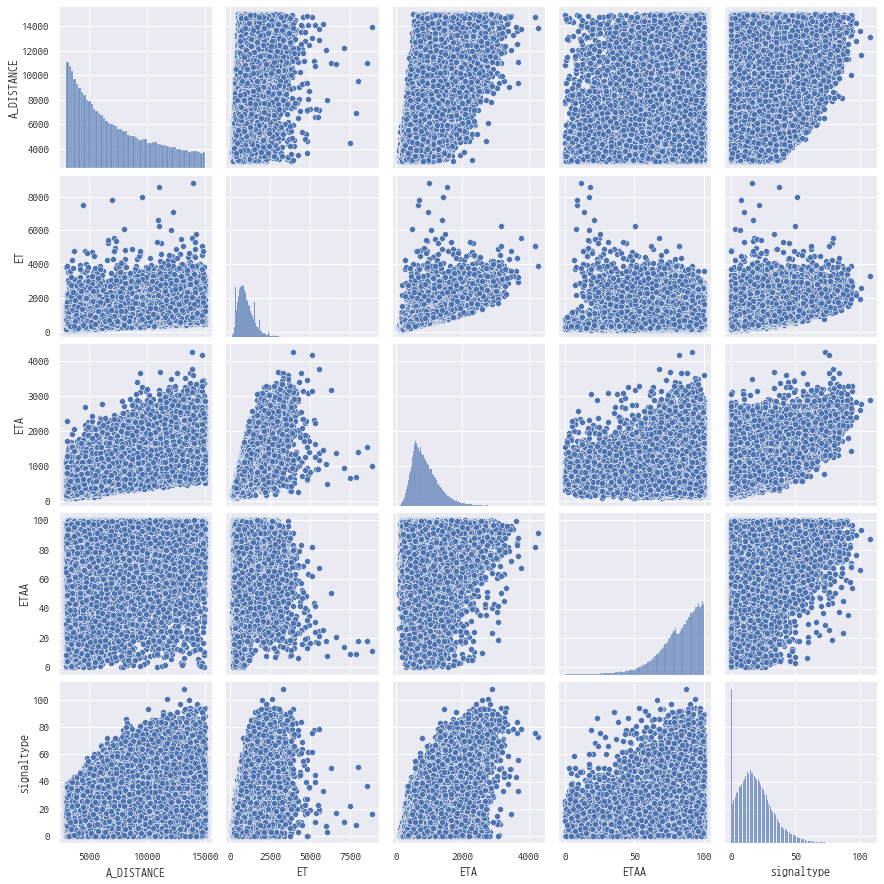

In [18]:
sns.pairplot(df_total)
plt.show()

### 다. 상관관계 분석(Pandas/Seaborn)
#### 상관관계 분석은 왜 하는것일까요?
##### 막연하게 상관관계는 높으면 좋을 것 같습니다. 하지만 AI모델링을 할때 꼭 좋은 것은 아닙니다. 가령 살아온 날수와 식사를 한 끼니 수는 강한 상관관계를 가질 것입니다. 그러나 조금만 다르게 보면 둘은 같은 이야기를 하는 것이라고 할 수 있습니다.(다중공선성의 문제)
##### 상관관계 계수만으로 어떤 결정을 한다는 것은 섣부른 일입니다. 어떤 변수인지 확인이 반드시 필요하며, 시각화를 통해 분포도 확인하고 결정을 해야합니다.
[다중공선성 해결 Tip]
* 상관관계가 높은 독립변수중 하나 혹은 일부를 제거
* 변수를 변형시키거나 새로운 관측치를 이용
* 기타 다른 분석을 이용

##### 1) 상관계수 구하기 : Pandas는 Corr 함수를 통해 상관계수를 손쉽게 구하도록 도와줍니다.

In [19]:
df_total.corr()

,A_DISTANCE,ET,ETA,ETAA,signaltype
A_DISTANCE,1.000000,0.531619,0.637841,0.172492,0.232966
ET,0.531619,1.000000,0.843409,0.001366,0.534659
ETA,0.637841,0.843409,1.000000,0.109389,0.608437
ETAA,0.172492,0.001366,0.109389,1.000000,0.094363
signaltype,0.232966,0.534659,0.608437,0.094363,1.000000


##### 2) Seaborn의 Heatmap을 활용한 시각화

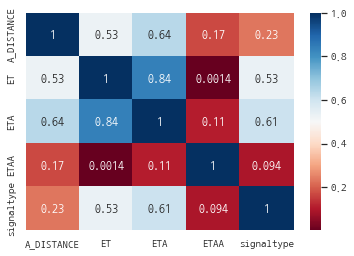

In [20]:
sns.heatmap(df_total.corr(), annot=True, cmap="RdBu")
plt.show()

### 라. [소개] 요인분석(FactorAnalyzer)
#### 다중공선성의 문제를 해결할 다른 방법은 무엇이 있을까? A: 변수를 변형시키거나 새로운 관측치를 이용
##### 요인분석이란 변수들 사이에서 잠재된 변수를 찾는 과정입니다. 이해를 위해 조금 거칠게 표현하면 드라마 선호도를 확인할 때 로멘스. 휴머니티, 범죄/스릴러, 정치, SF, 판타지 6가지로 조사한다면 내면에는 감성적(로맨스, 휴머니티), 이성적(범죄/스릴러, 정치), 창의적(SF, 판타지) 3가지 잠재적 요소의 영향을 확인하는 과정이라고 할 수 있습니다.
##### 요인분석을 통해 우리는 변수를 축소할 수 있고 잠재된 요소를 확인 할 수 있으나, 반드시 좋은 결과를 담보하는 것은 아니니 입체적으로 바라보고 적용해야 합니다.(일반적으로 크론바흐 계수 0.7이상에서 용인)

##### 1) 라이브러리 Import

In [21]:
# FactorAnalyzer는 설치안된 경우가 많을 것입니다. 설치를 먼저 진행합니다.
!pip install factor-analyzer

In [22]:
from factor_analyzer import FactorAnalyzer
from factor_analyzer.factor_analyzer import calculate_kmo

##### 2) Kaiser-Meyer-Olkin (KMO) 검정 : 요인 분석을위한 데이터의 적합성을 측정(0.6 미만의 KMO 값은 부적절한 것으로 간주)

In [23]:
# 요인분석은 수치형변수(int, float 등)으로만 이루어진 데이터에서 가능함으로 문자형 변수는 제거 필요
df.drop(['RID','TIME_DEPARTUREDATE','TIME_ARRIVEDATE'],axis=1)

,A_DISTANCE,ET,ETA,ETAA
0,12914.0,1201.534058,987.624634,82.196974
1,7483.0,823.817017,855.933716,96.101477
2,8087.0,526.710999,575.954529,90.650750
3,10528.0,898.581970,537.117004,59.773846
4,10636.0,957.758972,786.352539,82.103385
...,...,...,...,...
55895,4448.0,544.301025,550.907715,98.786207
55896,3106.0,535.666992,459.554443,85.791070
55897,10325.0,610.799988,791.658936,70.389825
55898,4458.0,878.479004,516.855774,58.835302


In [24]:
kmo_all,kmo_model=calculate_kmo(df.drop(['RID','TIME_DEPARTUREDATE','TIME_ARRIVEDATE'],axis=1))
kmo_model # 0.642878086837649 : 0.6 이상으로 양호함

0.642886301032003

##### 3) ScreePlot을 활용한 요인수 결정 : Elbow 기법
* 고유값(각각의 요인으로 설명할 수 있는 변수들의 분산 총합) 시각화

In [25]:
# 요인분석 오브젝트를 만들고 실행해보겠습니다.
fa = FactorAnalyzer()
fa.set_params(rotation=None)
fa.fit(df.drop(['RID','TIME_DEPARTUREDATE','TIME_ARRIVEDATE'],axis=1))
# 고유값 확인 * 고유값(eigenvalue):각각의 요인으로 설명할 수 있는 변수들의 분산 총합
ev, v = fa.get_eigenvalues()
ev

array([2.31612544, 1.00996934, 0.49386097, 0.18004425])

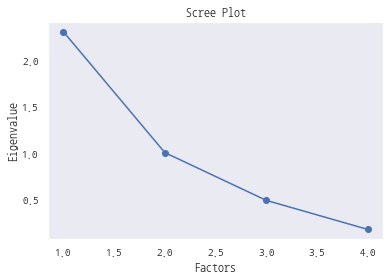

In [26]:
# Scree Plot을 그려서 Elbow 지점을 찾아봅시다.
plt.scatter(range(1,df.drop(['RID','TIME_DEPARTUREDATE','TIME_ARRIVEDATE'],axis=1).shape[1]+1),ev)
plt.plot(range(1,df.drop(['RID','TIME_DEPARTUREDATE','TIME_ARRIVEDATE'],axis=1).shape[1]+1),ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

##### 4) 요인부하량 확인 및 시각화

In [27]:
# 요인분석 오브젝트를 만들고 실행해보겠습니다.
fa = FactorAnalyzer()
fa.set_params(n_factors=3, rotation=None)
fa.fit(df.drop(['RID','TIME_DEPARTUREDATE','TIME_ARRIVEDATE'],axis=1))
pd.DataFrame(fa.loadings_) # 요인부하량 확인 : 0.4이상 유의미, 0.5이상 중요

,0,1,2
0,0.679646,0.271249,-0.044079
1,0.838614,-0.237390,0.029870
2,0.945088,-0.022657,-0.000887
3,0.104473,0.345907,0.055007


<AxesSubplot:>

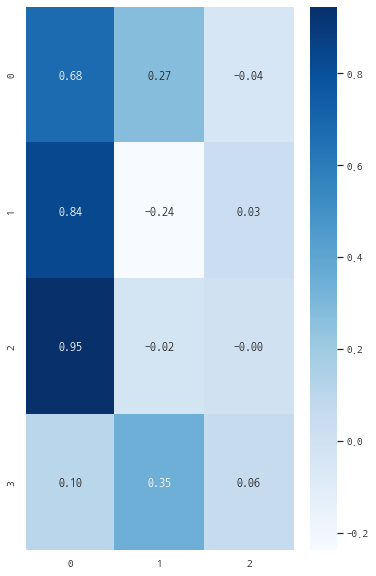

In [28]:
# Heat Map으로 그려서 확인해보겠습니다.
plt.figure(figsize=(6,10))
sns.heatmap(fa.loadings_, cmap="Blues", annot=True, fmt='.2f')

##### 5) 크론바흐 계수(신뢰도) 계산 : 0.8이상 양호

In [29]:
# 크론바흐 계수를 계산하는 함수를 선언하겠습니다.
def CronbachAlpha(itemscores):
    itemscores = np.asarray(itemscores)
    itemvars = itemscores.var(axis=0, ddof=1)
    tscores = itemscores.sum(axis=1)
    nitems = itemscores.shape[1]
    return (nitems / (nitems-1)) * (1 - (itemvars.sum() / tscores.var(ddof=1)))

In [30]:
# ET와 ETA 신뢰계수
print(CronbachAlpha(df[['ET','ETA']]))

0.8704020885393915


In [31]:
# ET와 ETAA 신뢰계수
print(CronbachAlpha(df[['ET','A_DISTANCE']]))

0.2822861666448333


##### 6) 요인점수를 활용한 변수 생성

In [32]:
fa.transform(df.drop(['RID','TIME_DEPARTUREDATE','TIME_ARRIVEDATE'],axis=1))

array([[ 4.88235289e-01,  5.80996577e-01, -1.13069270e-01],
       [-8.45438593e-02,  4.35261964e-01,  3.07436396e-02],
       [-6.44853842e-01,  6.45969071e-01, -4.04858298e-02],
       ...,
       [-1.99575757e-01,  5.88374367e-01, -1.85884426e-01],
       [-7.70328330e-01, -7.19058953e-01, -1.57684563e-02],
       [-6.35583355e-01, -1.72615014e-01,  3.09050292e-05]])